In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
B_0 = [0.67, 0.57, 0.47, 0.10]
EPRshifts = [7439.952379, 7078.050360, 7271.855095, 7808.988489]
EPRshift_dev = [327.649367, 231.444138, 388.451754, 410.259830]

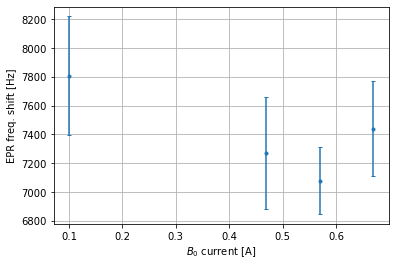

In [3]:
plt.errorbar(B_0, EPRshifts, EPRshift_dev, fmt = ".", capsize=2)
plt.xlabel("$B_0$ current [A]")
plt.ylabel("EPR freq. shift [Hz]")
plt.grid()

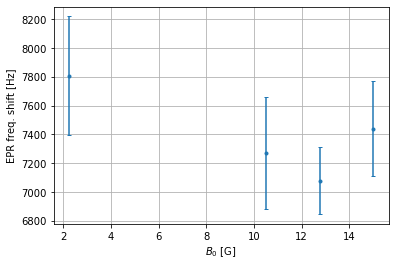

In [4]:
B_0 = [0.67, 0.57, 0.47, 0.10]
B_0 = [15*i/0.67 for i in B_0]
plt.errorbar(B_0, EPRshifts, EPRshift_dev, fmt = ".", capsize=2)
plt.xlabel("$B_0$ [G]")
plt.ylabel("EPR freq. shift [Hz]")
plt.grid()

In [10]:
T = 0 
mu_0 = 1.25663*10**(-6)          #[m kg s^-2 A^-2]
mu_B = 9.27401*10**(-24)         #[J T^-1] = [m^2 A]
mu_He = -1.07461*10**(-26)       #[J T^-1] = [m^2 A]
mu_N = 5.05078*10**(-27)
mu_Xe_131 = 0.687020*mu_N
mu_Xe_129 = -0.777960*mu_N
g_I = -0.000293640
g_e = -2.00231
#g_J = 2.002332
I = 5/2
A = 1.01191*10**9                #[s^-1]
He_num = 2.68678*3.3*10**25      #[m^-3]
Xe_num = 5.88*10**3*6.02*10**23/131.3           #[m^-3]
B = 1.5*10**(-3)                 #[T]
kappa_Xe = 518
h = 6.62607*10**(-34)  #[J s]

In [18]:
def CalPol(EPRshifts, EPRshift_dev, B_0):
    abs_Pol = 100*EPRshifts/(2*(2*mu_0/3)*(mu_B*g_e/(h*(2*I+1)))*(1-(8*I/(2*I+1)**2)*(mu_B*g_e*B/(h*A)))*kappa_Xe*mu_Xe_129*Xe_num)
    abs_Pol_std = 100*EPRshift_dev/(2*(2*mu_0/3)*(mu_B*g_e/(h*(2*I+1)))*(1-(8*I/(2*I+1)**2)*(mu_B*g_e*B/(h*A)))*kappa_Xe*mu_Xe_129*Xe_num)

    return abs_Pol, abs_Pol_std

In [19]:
pol_l = []
pol_dev_l = []

for i in range(len(EPRshifts)):
    pol, pol_dev = CalPol(EPRshifts[i], EPRshift_dev[i], B_0[i]/10**4)
    pol_l.append(pol)
    pol_dev_l.append(pol_dev)

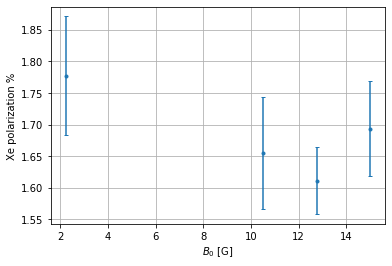

In [20]:
plt.errorbar(B_0, pol_l, pol_dev_l, fmt=".", capsize=2)
plt.xlabel("$B_0$ [G]")
plt.ylabel("Xe polarization %")
plt.grid()